In [ ]:
!unzip /content/PPG_Signal.zip

Archive:  /content/PPG_Signal.zip
  inflating: PPG_Signal/p040000.csv  
  inflating: PPG_Signal/p040013.csv  
  inflating: PPG_Signal/p040019.csv  
  inflating: PPG_Signal/p040033.csv  
  inflating: PPG_Signal/p040042.csv  
  inflating: PPG_Signal/p040057.csv  
  inflating: PPG_Signal/p040059.csv  
  inflating: PPG_Signal/p040063.csv  
  inflating: PPG_Signal/p040068.csv  
  inflating: PPG_Signal/p040083.csv  
  inflating: PPG_Signal/p040084.csv  
  inflating: PPG_Signal/p040133.csv  
  inflating: PPG_Signal/p040161.csv  
  inflating: PPG_Signal/p040179.csv  
  inflating: PPG_Signal/p040189.csv  
  inflating: PPG_Signal/p040200.csv  
  inflating: PPG_Signal/p040206.csv  
  inflating: PPG_Signal/p040213.csv  
  inflating: PPG_Signal/p040236.csv  
  inflating: PPG_Signal/p040239.csv  
  inflating: PPG_Signal/p040241.csv  
  inflating: PPG_Signal/p040246.csv  
  inflating: PPG_Signal/p040253.csv  
  inflating: PPG_Signal/p040269.csv  
  inflating: PPG_Signal/p040299.csv  
  inflating: PPG

In [1]:
import pandas as pd
import os

# Tentukan direktori dimana file CSV berada
directory_path = '/content/'

# Membaca semua file CSV dalam direktori
all_files = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]
df_list = [pd.read_csv(file) for file in all_files]

# Menggabungkan semua DataFrame ke dalam satu DataFrame besar
complete_df = pd.concat(df_list, ignore_index=True)

# Menampilkan informasi dasar dan lima baris pertama dari DataFrame
print(complete_df.info())
print(complete_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Columns: 4202 entries, 0 to Mean_NBP_Dias
dtypes: float64(4202)
memory usage: 1.7 MB
None
          0         1         2         3         4         5         6  \
0  1.698925  1.691105  1.682307  1.672532  1.665689  1.660802  1.653959   
1  0.974585  1.020528  1.075269  1.138807  1.219941  1.313783  1.414467   
2  1.746823  1.719453  1.695015  1.667644  1.639296  1.610948  1.582600   
3  0.578690  0.560117  0.542522  0.524927  0.506354  0.486804  0.467253   
4  0.485826  0.481916  0.477028  0.473118  0.469208  0.464321  0.460411   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.647116  1.641251  1.635386  ...  2.566960  2.507331  2.444770  2.378299   
1  1.515152  1.615836  1.712610  ...  2.201369  2.283480  2.370479  2.453568   
2  1.555230  1.528837  1.502444  ...  3.135875  3.149560  3.165200  3.177908   
3  0.449658  0.433040  0.417400  ...  0.397849  0.396872  0.395894  0

               0          1          2          3          4          5  \
count  54.000000  54.000000  54.000000  54.000000  54.000000  54.000000   
mean    1.031910   1.028811   1.026817   1.026128   1.027141   1.028914   
std     0.772118   0.766763   0.761899   0.757500   0.754359   0.753173   
min     0.164223   0.161290   0.159335   0.157380   0.155425   0.153470   
25%     0.399020   0.406863   0.407047   0.394969   0.406863   0.405882   
50%     0.637295   0.629469   0.631373   0.633333   0.631373   0.631373   
75%     1.528837   1.598729   1.625122   1.607038   1.576002   1.610704   
max     2.900293   2.920821   2.928641   2.923754   2.908113   2.882698   

               6          7          8          9  ...       4192       4193  \
count  54.000000  54.000000  54.000000  54.000000  ...  54.000000  54.000000   
mean    1.031775   1.035014   1.038635   1.042019  ...   0.993811   0.988016   
std     0.753975   0.757943   0.763535   0.770713  ...   0.748982   0.743383   
min 

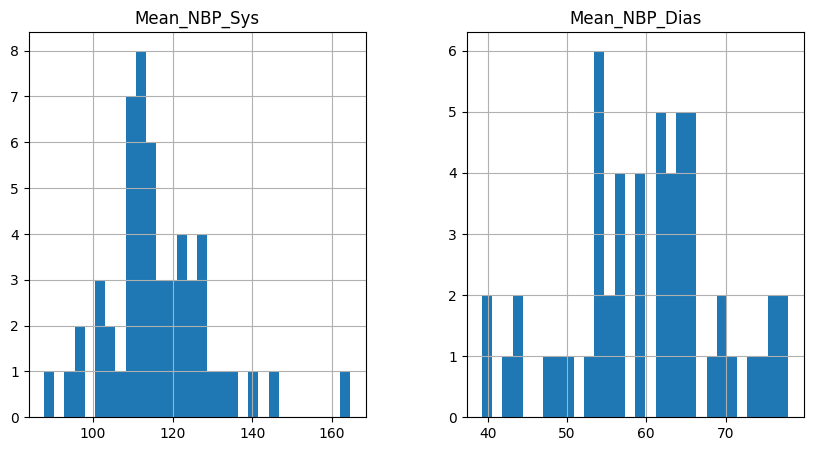

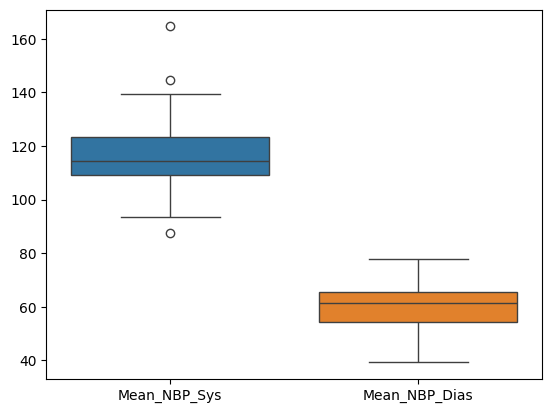

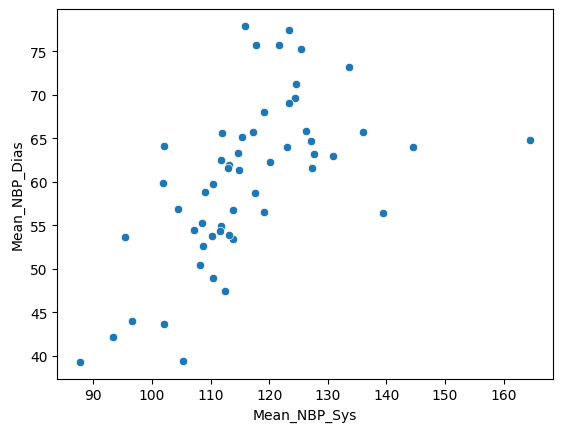

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik Deskriptif
print(complete_df.describe())

# Pengecekan Nilai Hilang
print(complete_df.isnull().sum())

# Korelasi
correlation_matrix = complete_df.corr()
print(correlation_matrix['Mean_NBP_Sys'].sort_values(ascending=False))
print(correlation_matrix['Mean_NBP_Dias'].sort_values(ascending=False))

# Visualisasi histogram untuk beberapa fitur
complete_df[['Mean_NBP_Sys', 'Mean_NBP_Dias']].hist(bins=30, figsize=(10, 5))
plt.show()

# Boxplot untuk melihat outliers
sns.boxplot(data=complete_df[['Mean_NBP_Sys', 'Mean_NBP_Dias']])
plt.show()

# Scatter plot untuk melihat hubungan antara Systolic dan Diastolic
sns.scatterplot(x='Mean_NBP_Sys', y='Mean_NBP_Dias', data=complete_df)
plt.show()


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Menentukan fitur dan target
X = complete_df.drop(['Mean_NBP_Sys', 'Mean_NBP_Dias'], axis=1)
y = complete_df[['Mean_NBP_Sys', 'Mean_NBP_Dias']]

# Memisahkan data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengganti NaN dengan median dari setiap kolom
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()

# Tempat untuk menyimpan hasil
results = {}

# Fungsi untuk melatih dan mengevaluasi model
def train_eval_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R^2': r2}
    print(f'{model_name} - RMSE: {rmse}, R^2: {r2}')

# Melatih dan mengevaluasi Linear Regression
train_eval_model(lr, 'Linear Regression', X_train_scaled, y_train, X_test_scaled, y_test)

# Melatih dan mengevaluasi Random Forest
train_eval_model(rf, 'Random Forest', X_train_scaled, y_train, X_test_scaled, y_test)

# Melatih dan mengevaluasi KNN
train_eval_model(knn, 'KNN', X_train_scaled, y_train, X_test_scaled, y_test)

# Mencetak dan membandingkan hasil RMSE dan R^2 dari semua model
for model_name, metrics in results.items():
    print(f'{model_name} - RMSE: {metrics["RMSE"]}, R^2: {metrics["R^2"]}')


Linear Regression - RMSE: 36.95997063810434, R^2: -11.514929652273672
Random Forest - RMSE: 11.018846410276918, R^2: -0.11566293501827396
KNN - RMSE: 11.620638365567942, R^2: -0.22166477835617138
Linear Regression - RMSE: 36.95997063810434, R^2: -11.514929652273672
Random Forest - RMSE: 11.018846410276918, R^2: -0.11566293501827396
KNN - RMSE: 11.620638365567942, R^2: -0.22166477835617138


In [7]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Grid Search dengan Random Forest model
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              n_jobs=-1,
                              scoring='neg_mean_squared_error',
                              verbose=2)

# Melakukan fitting dan mencari parameter terbaik
grid_search_rf.fit(X_train_scaled, y_train)

# Hasil terbaik
best_params_rf = grid_search_rf.best_params_
best_score_rf = (-grid_search_rf.best_score_)**0.5  # Convert neg MSE to RMSE
print(f'Best params for Random Forest: {best_params_rf}')
print(f'Best RMSE for Random Forest: {best_score_rf}')


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best params for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best RMSE for Random Forest: 11.651311073845951


In [8]:
# Melatih model Random Forest dengan parameter terbaik
random_forest_tuned = RandomForestRegressor(
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators'],
    random_state=42
)

random_forest_tuned.fit(X_train_scaled, y_train)

# Membuat prediksi dengan model yang sudah dituning
y_pred_tuned_rf = random_forest_tuned.predict(X_test_scaled)

# Menghitung metrik evaluasi
rmse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf, squared=False)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print(f'Tuned Random Forest RMSE: {rmse_tuned_rf}')
print(f'Tuned Random Forest R^2: {r2_tuned_rf}')


Tuned Random Forest RMSE: 10.612760341823062
Tuned Random Forest R^2: -0.047357892122841694
